In [46]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Dim_User.xlsx")

# Show first few rows
df.head()


,User ID,Gender,Device,Country,FamilyMember,Age,TimeConsumingPerWeek,Genre,Satisfaction,MontlyIncomeUSD
0,1,Male,Smartphone,United States,5,21,9,Horror,Satisfied,900
1,2,Female,Tablet,Canada,5,17,7,Comedy,Extremely satisfied,700
2,3,Male,Smart TV,United Kingdom,3,22,8,Action & Adventure,Neutral,800
3,4,Female,Laptop,Australia,4,24,8,Horror,Extremely satisfied,600
4,5,Male,Smartphone,Germany,2,23,9,Action & Adventure,Extremely satisfied,1000


In [72]:
df.info()
df.describe(include='all')
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   User_ID               824 non-null    int64   
 1   Gender                824 non-null    object  
 2   Device                824 non-null    object  
 3   Country               824 non-null    object  
 4   FamilyMember          824 non-null    int64   
 5   Age                   824 non-null    int64   
 6   TimeConsumingPerWeek  824 non-null    int64   
 7   Genre                 824 non-null    object  
 8   Satisfaction          824 non-null    object  
 9   MontlyIncomeUSD       824 non-null    int64   
 10  AgeGroup              824 non-null    category
dtypes: category(1), int64(5), object(5)
memory usage: 65.5+ KB


Index(['User_ID', 'Gender', 'Device', 'Country', 'FamilyMember', 'Age',
       'TimeConsumingPerWeek', 'Genre', 'Satisfaction', 'MontlyIncomeUSD',
       'AgeGroup'],
      dtype='object')

In [74]:
# Check missing values
df.isnull().sum()

# Drop any duplicates (if needed)
df.drop_duplicates(inplace=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_18444\1757324448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')


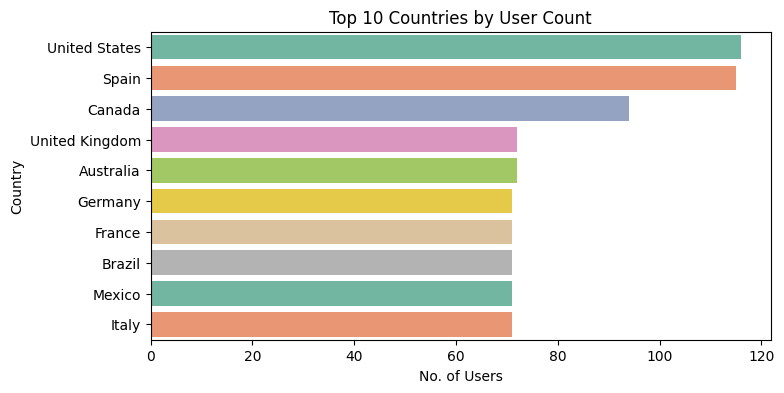

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')
plt.title("Top 10 Countries by User Count")
plt.xlabel("No. of Users")
plt.ylabel("Country")
plt.show()


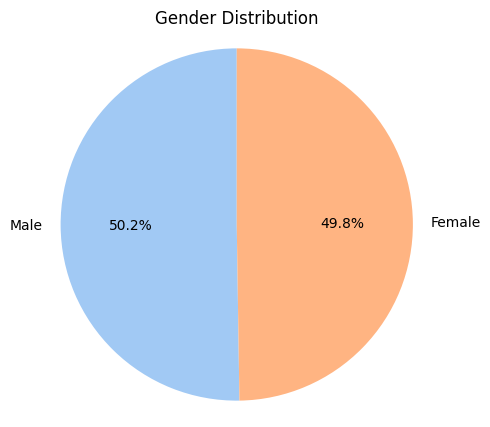

In [78]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_18444\862670545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='husl')


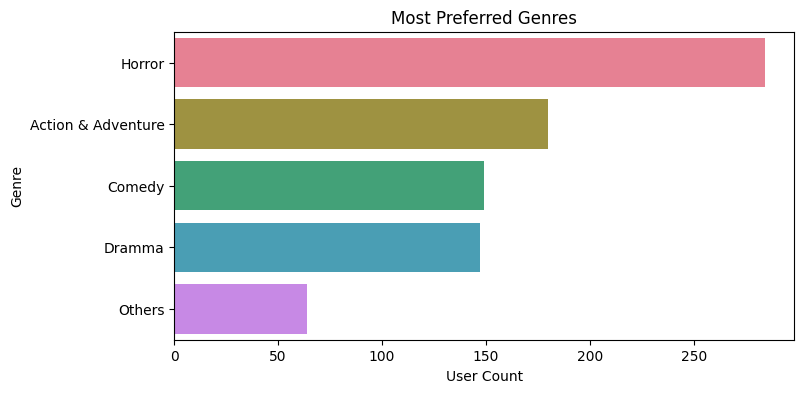

In [80]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='husl')
plt.title("Most Preferred Genres")
plt.xlabel("User Count")
plt.ylabel("Genre")
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_18444\2895230241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=df, palette='Purples')


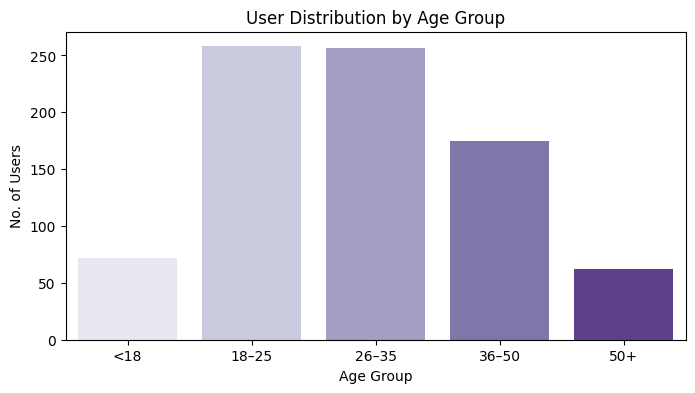

In [82]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100],
                        labels=['<18', '18–25', '26–35', '36–50', '50+'])

plt.figure(figsize=(8,4))
sns.countplot(x='AgeGroup', data=df, palette='Purples')
plt.title("User Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("No. of Users")
plt.show()


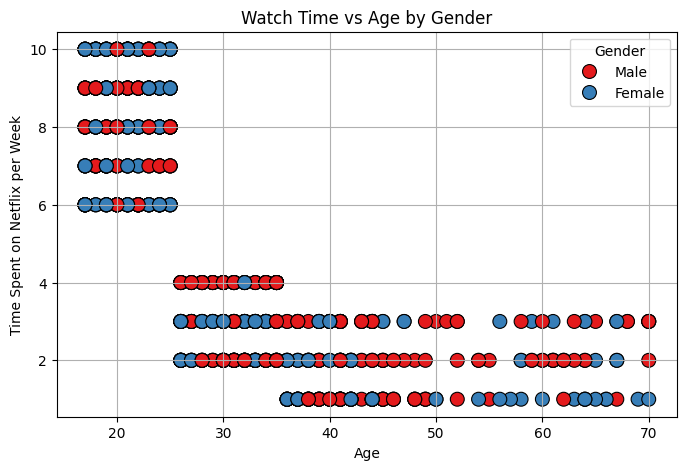

In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='TimeConsumingPerWeek', hue='Gender', data=df, palette='Set1', s=100, edgecolor='black')
plt.title("Watch Time vs Age by Gender")
plt.xlabel("Age")
plt.ylabel("Time Spent on Netflix per Week")
plt.grid(True)
plt.show()


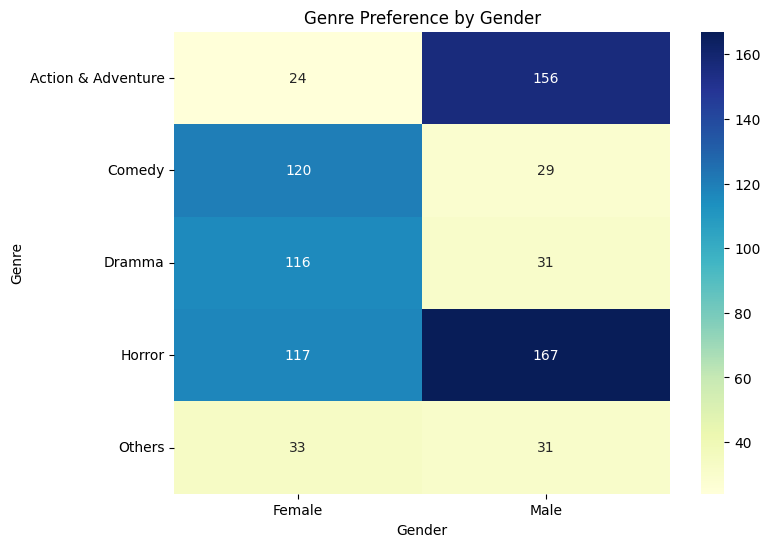

In [85]:
heatmap_data = pd.crosstab(df['Genre'], df['Gender'])

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Genre Preference by Gender")
plt.ylabel("Genre")
plt.xlabel("Gender")
plt.show()


In [88]:
df["Gender"].unique()
df["Country"].unique()



array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

In [90]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)